<a href="https://colab.research.google.com/github/LaZoark/Face_recognization_on_class/blob/main/Face_recognization_on_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!nvidia-smi

Tue Dec  8 07:59:48 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    33W / 250W |    940MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [20]:
!rm -rf /content/idol3 idol3_face

In [12]:
dataurl = 'https://www.google.com.tw/search?ei=MswPXJnSDMaT8wWwoozQDA&yv=3&q={}&tbm=isch&vet=10ahUKEwiZs6TsgJjfAhXGybwKHTARA8oQuT0IMigB.MswPXJnSDMaT8wWwoozQDA.i&ved=0ahUKEwiZs6TsgJjfAhXGybwKHTARA8oQuT0IMigB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
import requests 
from bs4 import BeautifulSoup
def getIdolImg(keyword, dstpath):
    for i in range(3):
        res = requests.get(dataurl.format(keyword, i * 10))
        soup = BeautifulSoup(res.text, 'lxml')
        for ele in soup.select('img'):
            print(ele)
            imgurl = ele.get('src')
            if imgurl is None:
                imgurl = ele.get('data-src')
            if imgurl is None:
                continue
            fname  = imgurl.split('tbn:')[1] 
            with open(dstpath + fname + '.jpg', 'wb') as f:
                res2 = requests.get(imgurl)
                f.write(res2.content)

In [ ]:
import os  
os.mkdir('idol3/')
getIdolImg('鈕承澤', 'idol3/')
import os  
os.mkdir('idol3_face/')

In [ ]:
from PIL import Image
import os
import cv2 as cv
srcpath = 'idol3/' 
dstpath = 'idol3_face/'
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
for fname in os.listdir(srcpath):
    img = Image.open(srcpath + fname)
    imgary = cv.imread(srcpath + fname)
    faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
    if len(faces) == 1:
        x,y,w,h = faces[0]
        crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
        crpim.save(dstpath + fname)

In [ ]:
!unzip /content/star.zip

In [39]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     
                                   zoom_range = 0.2,      
                                   horizontal_flip = True)

In [40]:
training_set = train_datagen.flow_from_directory(
    'idoltrain/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 232 images belonging to 3 classes.


In [41]:
test_set = test_datagen.flow_from_directory(
    'idoltest/', target_size = (64, 64),
    batch_size = 10, 
    class_mode = 'categorical')

Found 66 images belonging to 3 classes.


In [42]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

In [43]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=3,activation='softmax'))
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
history = model.fit_generator(training_set,
                         epochs=50,
                         steps_per_epoch = 10,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/50
10/10 [==============================] - 0s 30ms/step - loss: 1.1772 - accuracy: 0.2935 - val_loss: 1.0987 - val_accuracy: 0.2727
Epoch 2/50
10/10 [==============================] - 0s 20ms/step - loss: 1.0917 - accuracy: 0.3700 - val_loss: 1.0953 - val_accuracy: 0.3030
Epoch 3/50
10/10 [==============================] - 0s 19ms/step - loss: 1.0931 - accuracy: 0.3804 - val_loss: 1.0794 - val_accuracy: 0.4242
Epoch 4/50
10/10 [==============================] - 0s 19ms/step - loss: 1.0740 - accuracy: 0.4565 - val_loss: 1.0498 - val_accuracy: 0.4848
Epoch 5/50
10/10 [==============================] - 0s 19ms/step - loss: 1.0540 - accuracy: 0.5109 - val_loss: 0.9628 - val_accuracy: 0.6061
Epoch 6/50
10/10 [==============================] - 0s 20ms/step - loss: 0.8952 - accuracy: 0.6413 - val_loss: 1.0944 - val_accuracy: 0.3939
Epoch 7/50
10/10 [==============================] - 0s 19ms/step - loss: 1.0772 - accuracy: 0.5100 - val_loss: 0.9860 - val_accuracy: 0.5152
Epoch 8/50
10

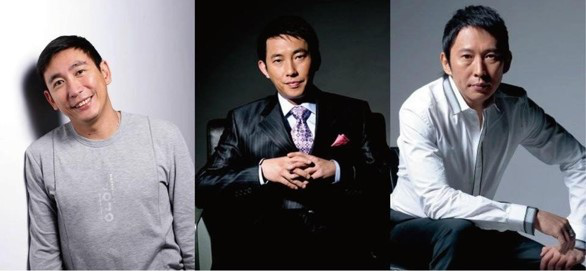

In [46]:
from PIL import Image
im = Image.open('star.jpg')
im

In [47]:
transform_dic = {
    'idol1_face' : "Chu Zhong Heng",
    'idol2_face' : "Sung Shao Ching",
    'idol3_face' : "Niu Chen Zer"
}
name_dic = {v:transform_dic.get(k) for k,v in training_set.class_indices.items()}
name_dic

{0: 'Chu Zhong Heng', 1: 'Sung Shao Ching', 2: 'Niu Chen Zer'}

In [48]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv.imread('star.jpg')
faces = face_cascade.detectMultiScale(img, 1.2, 3)
faces

array([[259,  35,  59,  59],
       [446,  31,  65,  65],
       [ 37,  49,  68,  68]], dtype=int32)

In [50]:
from keras.preprocessing import image
import numpy as np
from matplotlib import pyplot as plt 
from PIL import ImageFont, ImageDraw, Image
font = cv.FONT_HERSHEY_PLAIN
for x,y,w,h in faces:
    box = (x, y, x+w, y+h)
    crpim = im.crop(box).resize((64,64))
    target_image = image.img_to_array(crpim)
    target_image = np.expand_dims(target_image, axis = 0)
    res = model.predict_classes(target_image)[0]
    cv.rectangle(img,(x,y),(x+w,y+h),(14,201,255),2)
    cv.putText(img,name_dic.get(res), (x + int(w/3)-70, y-10), font, 1.5, (14,201,255), 3)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Populating the interactive namespace from numpy and matplotlib


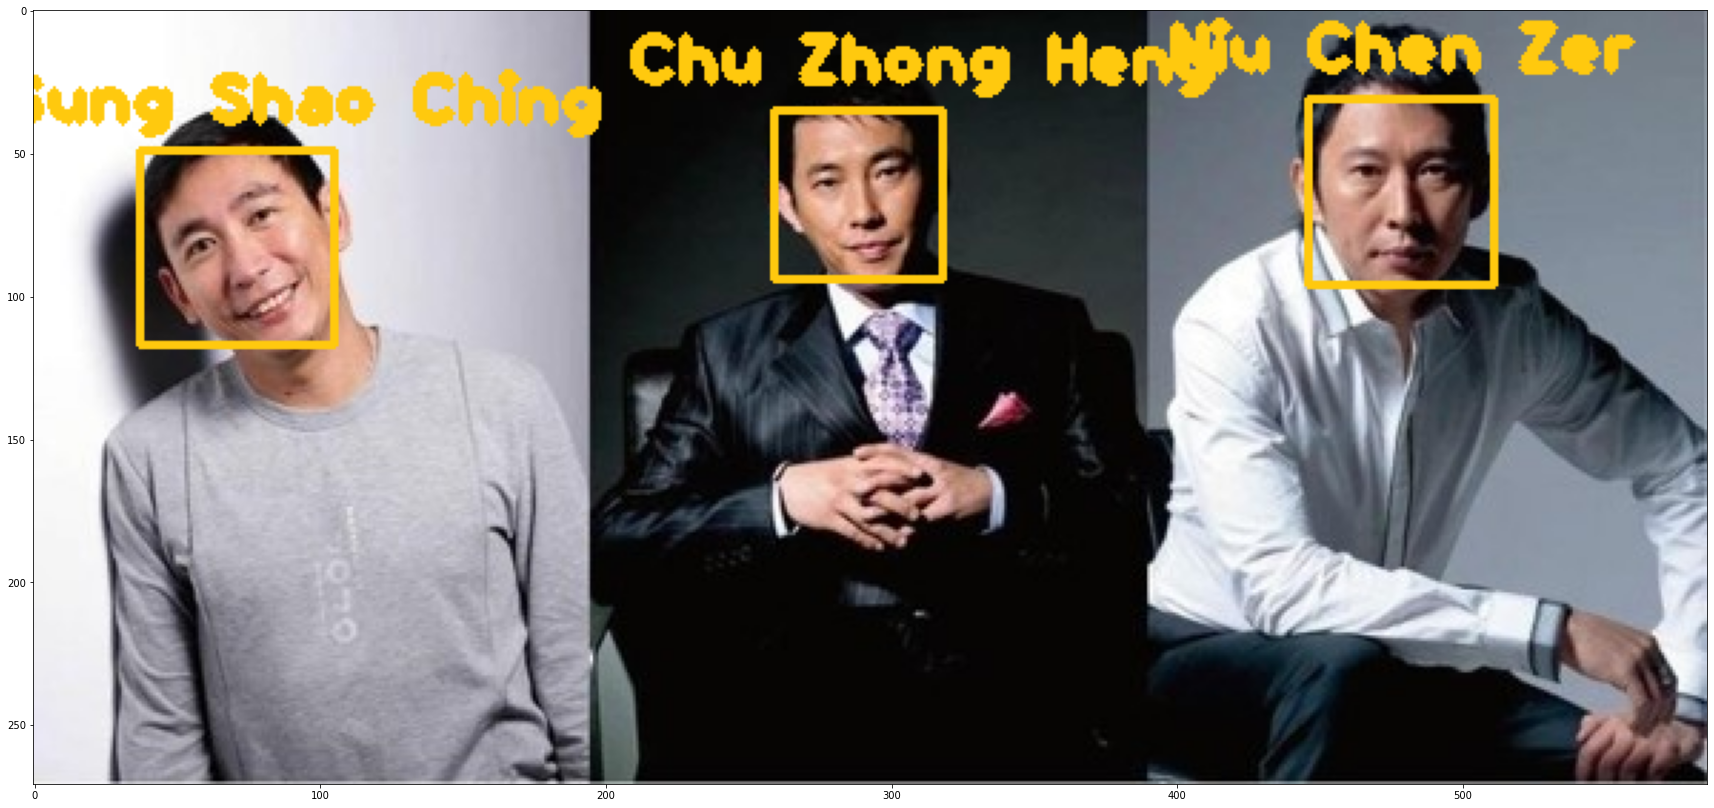

In [52]:
%pylab inline
plt.figure(figsize=(30,20))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))